In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

## Get to know with the data 

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.isnull().sum()/len(data) * 10

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.393346
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


## Preprocessing 

In [6]:
data = clean_data(data)

C:\Users\HP\PycharmProjects\BigData\.venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [43]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Data analysing and visualisation

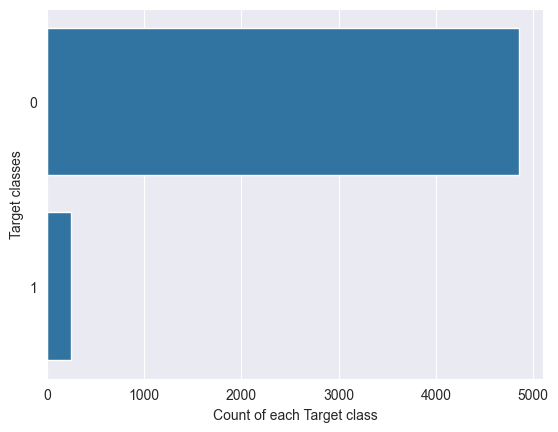

In [7]:
sns.countplot(y=data['stroke'] ,data=data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

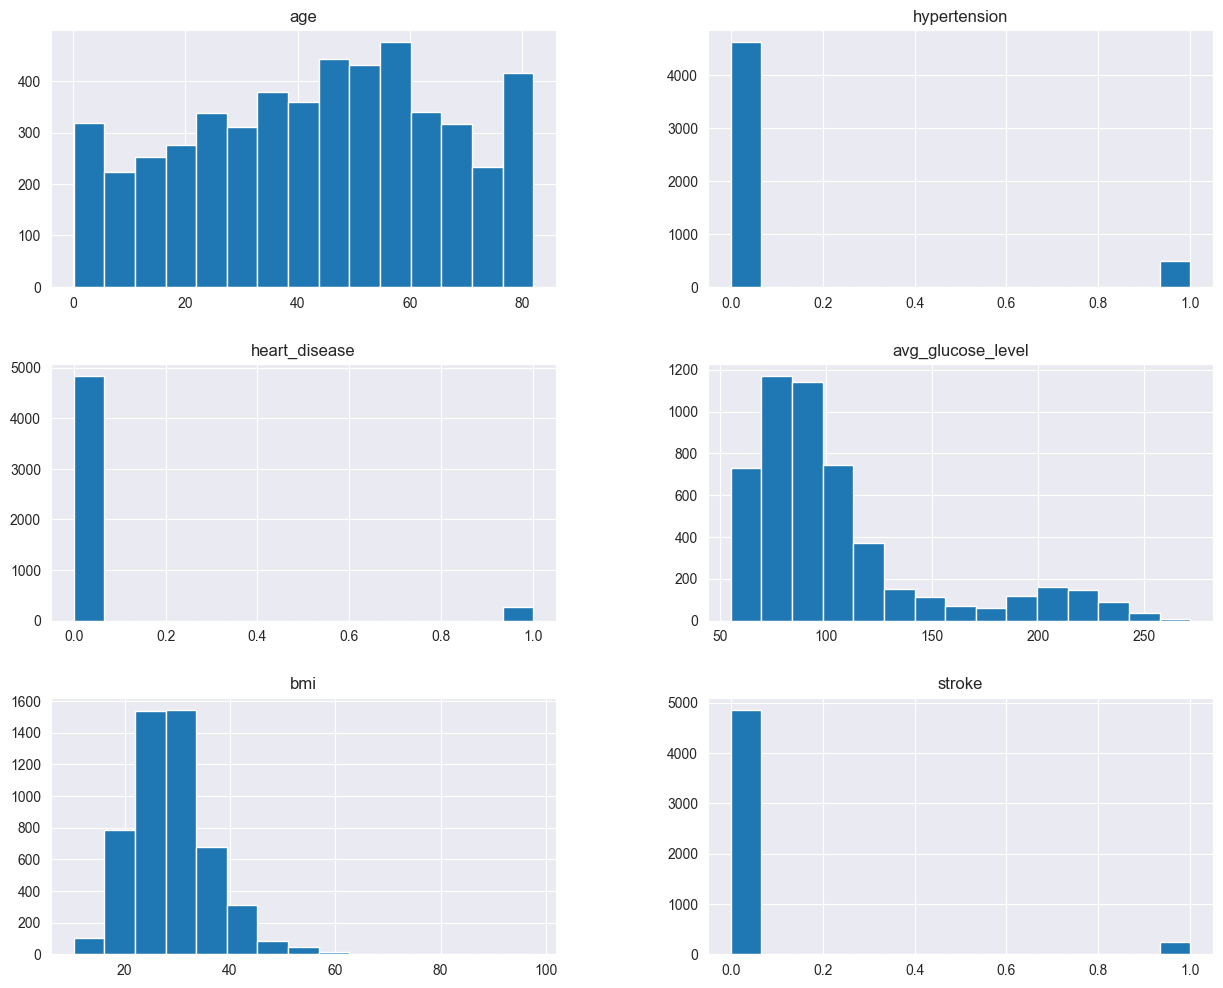

In [8]:
data.hist(figsize=(15,12),bins = 15)
plt.show()

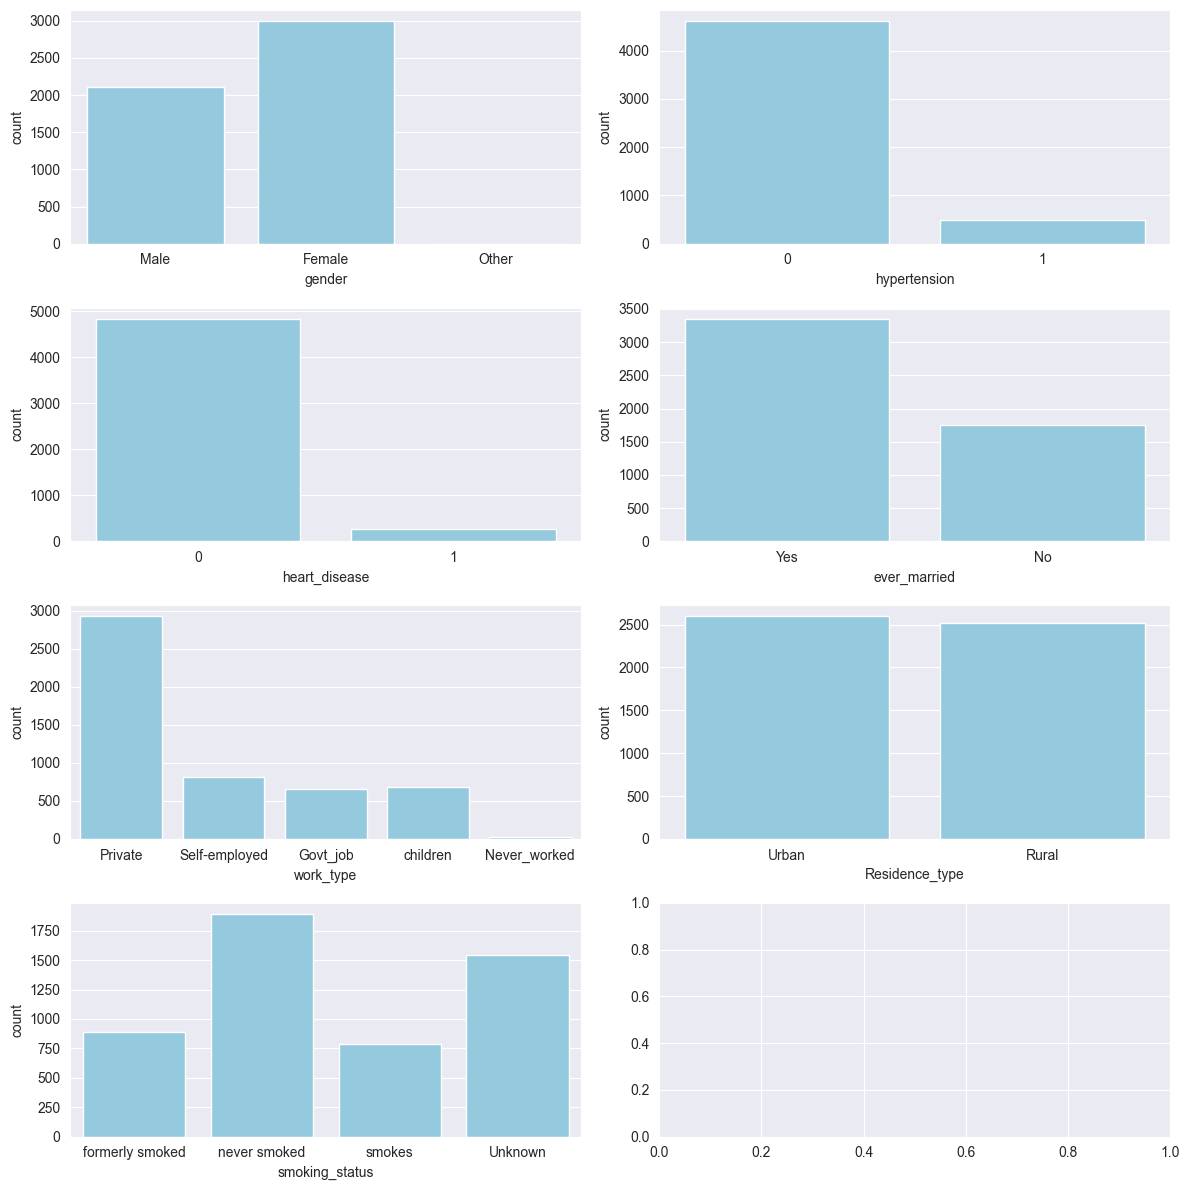

In [9]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))
sns.countplot(ax = axes[0,0], x='gender', data=data, color='skyblue')
sns.countplot(ax = axes[0,1], x='hypertension', data=data, color='skyblue')
sns.countplot(ax = axes[1,0], x='heart_disease', data=data, color='skyblue')
sns.countplot(ax = axes[1,1], x='ever_married', data=data, color='skyblue')
sns.countplot(ax = axes[2,0], x='work_type', data=data, color='skyblue')
sns.countplot(ax = axes[2,1], x='Residence_type', data=data, color='skyblue')
sns.countplot(ax = axes[3,0], x='smoking_status', data=data, color='skyblue')
plt.tight_layout()
plt.show()

<Axes: xlabel='stroke', ylabel='bmi'>

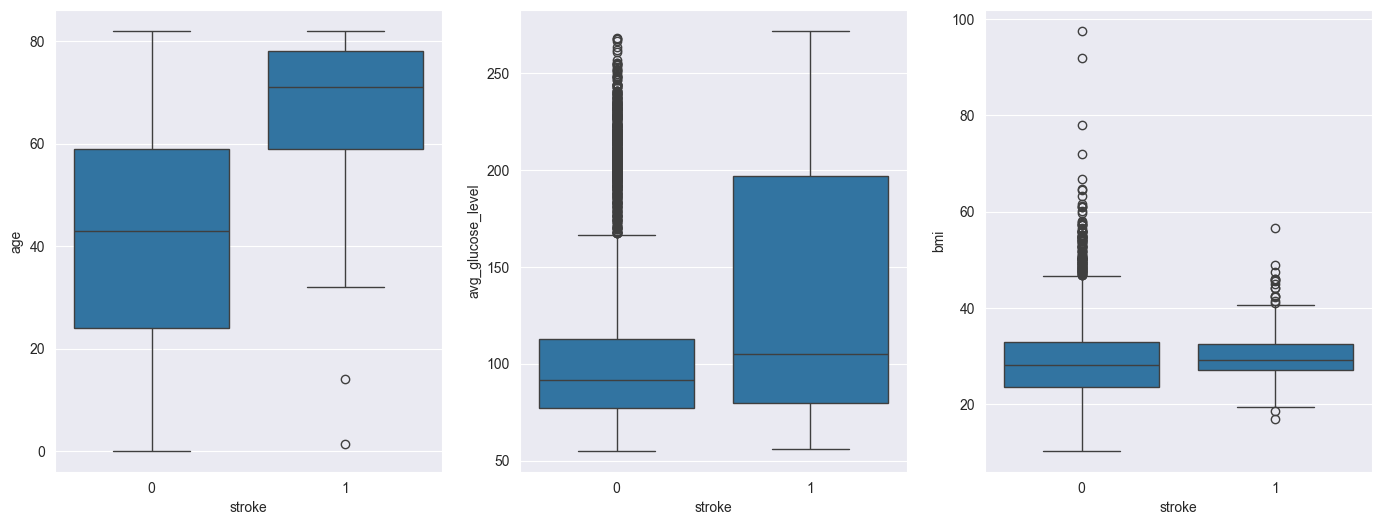

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(17,6))
sns.boxplot(ax = axes[0], data=data, x="stroke", y="age")
sns.boxplot(ax = axes[1], data=data, x="stroke", y="avg_glucose_level")
sns.boxplot(ax = axes[2], data=data, x="stroke", y="bmi")


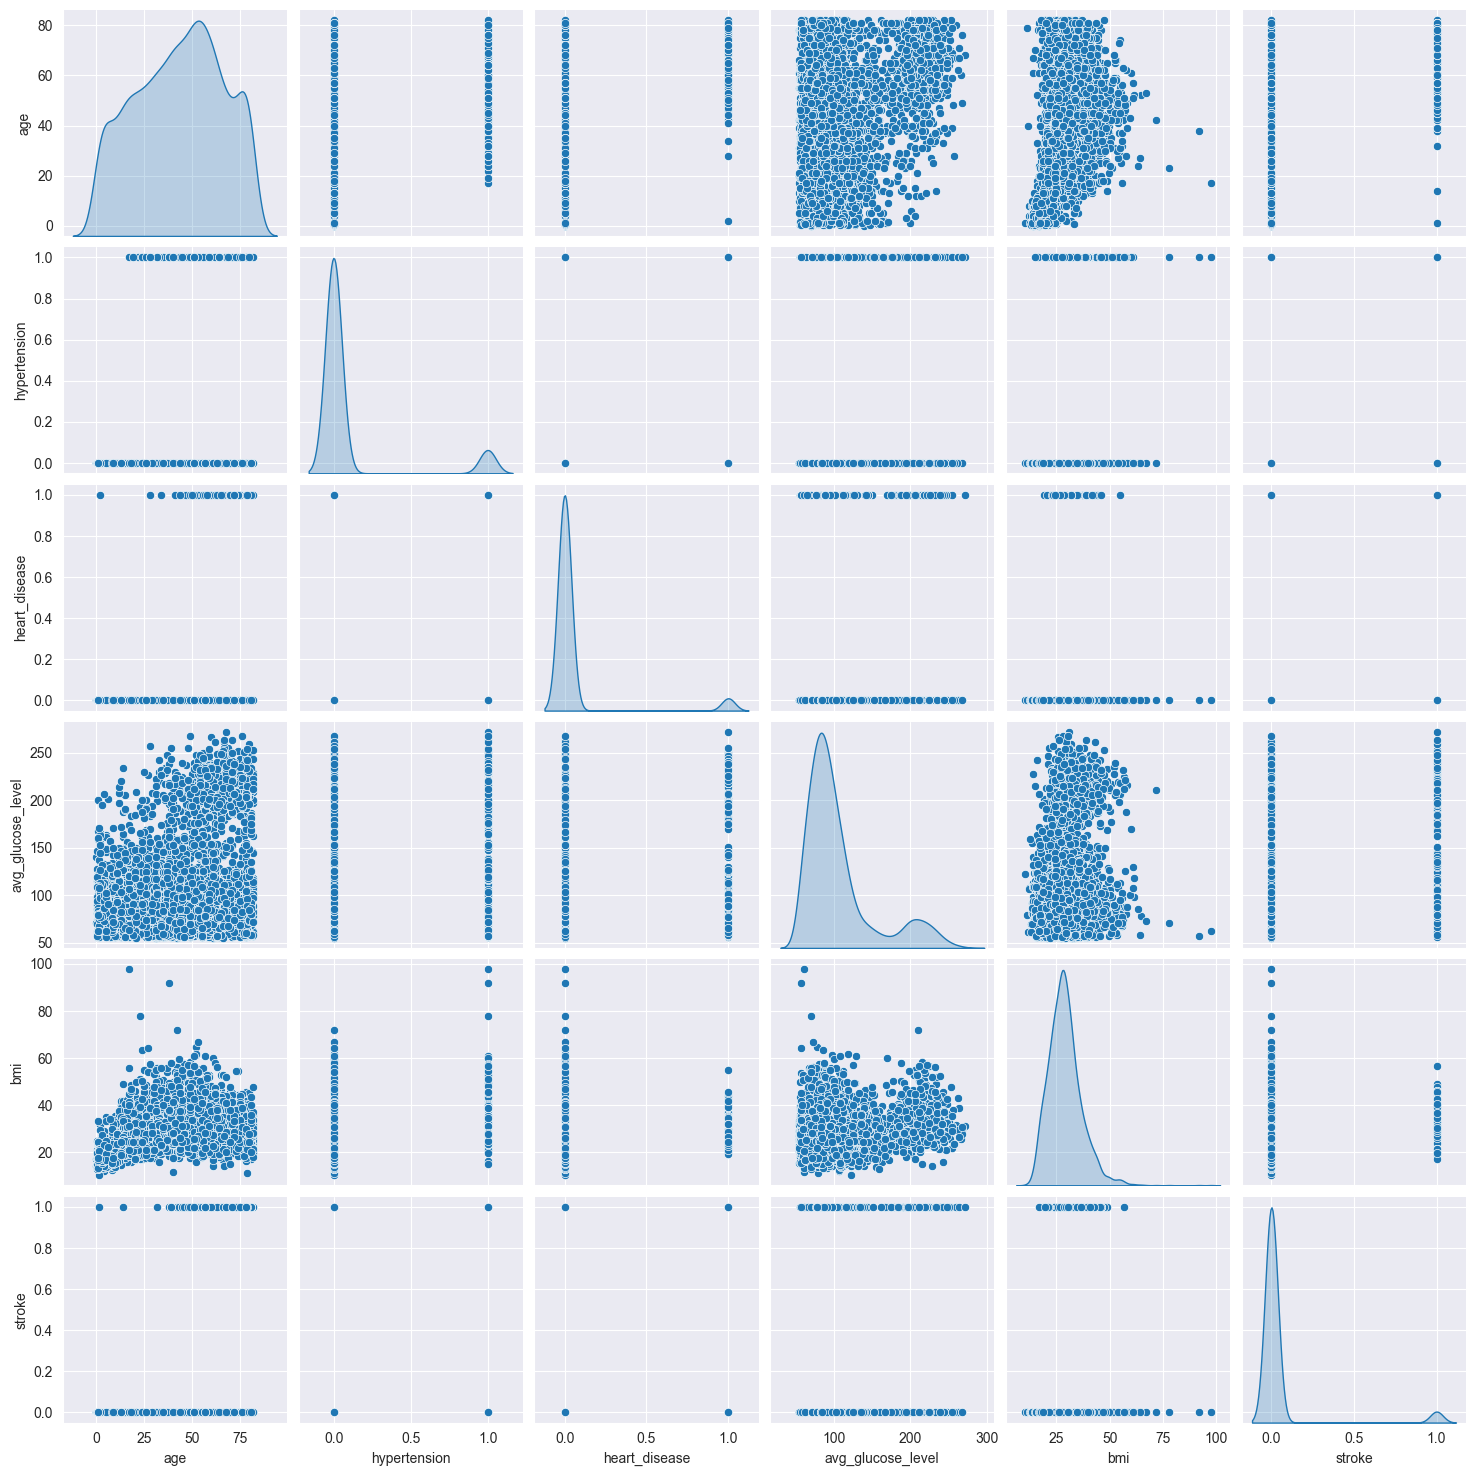

In [11]:
sns.pairplot(data, diag_kind='kde')   

## Change categorical features 

In [12]:
data_new = deal_with_categorical_features(data)

## Correlation analysis, removing unnecessary columns, combining correlated columns

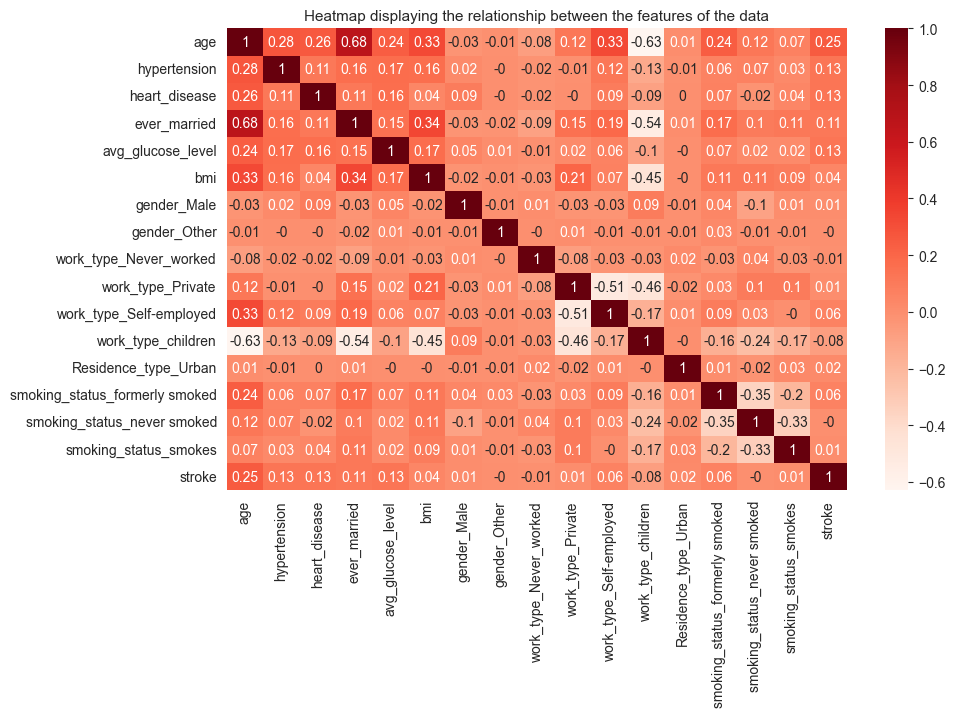

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(data_new.corr().round(2), cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=11)
plt.show()

In [14]:
# show correlated features 
cor_features(data_new)

Highly correlated features: {'work_type_children', 'ever_married'}


In [15]:
# show significant features 
significant_features = signif_features(data_new)

stroke
age
heart_disease
avg_glucose_level
hypertension
ever_married


In [16]:
data_new = data_new[significant_features]
data_new

,stroke,age,heart_disease,avg_glucose_level,hypertension,ever_married
0,1,67.0,1,228.69,0,1
1,1,61.0,0,202.21,0,1
2,1,80.0,1,105.92,0,1
3,1,49.0,0,171.23,0,1
4,1,79.0,0,174.12,1,1
...,...,...,...,...,...,...
5105,0,80.0,0,83.75,1,1
5106,0,81.0,0,125.20,0,1
5107,0,35.0,0,82.99,0,1
5108,0,51.0,0,166.29,0,1


## Spliting data and standarization

In [17]:
X = data_new.iloc[:,1:]
y = data_new.iloc[:, 0]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
col_to_stand = ['age', 'avg_glucose_level']
scaler = StandardScaler()
X_test[col_to_stand] = scaler.fit_transform(X_test[col_to_stand])
X_train[col_to_stand] = scaler.fit_transform(X_train[col_to_stand])

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
y_train = y_train.reshape(-1, 1)


In [19]:
X_train.shape

(4087, 5)

In [20]:
y_train.shape

(4087, 1)

## Classifier evaluation functions and metrics

In [21]:
def cm_plot(cm):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

In [22]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, auc

def p_metrics(y_test, y_pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Precyzja (Precision):", precision) # TP/TP+FP = 5/5+14
    print("Pełność (Recall):", recall) # TP/TP+FN = 5/49+5
    print("Dokładność (Accuracy):", accuracy)
    return precision, recall, accuracy

In [23]:
def aoc_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

## MLP prediction 

In [24]:
from multi_layer_perc import *
from sklearn import metrics

mlp = MLP(sigmoid, sigmoid_derivative, input_layer=5, hidden_layer=7, output_layer=1)
mlp.train(X_train, y_train)
y_pred = mlp.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)


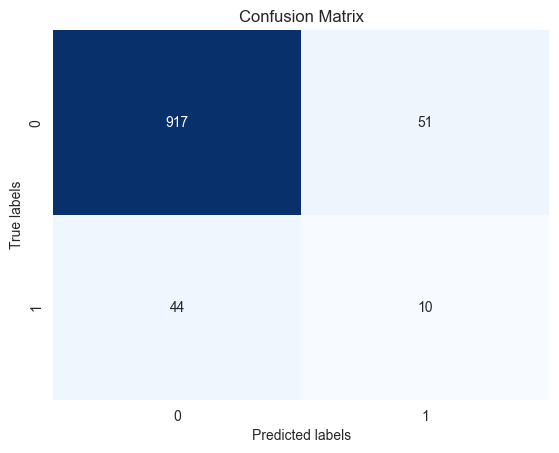

In [25]:
cm_plot(cm)

In [26]:
p1, r1, a1 = p_metrics(y_test, y_pred)

Precyzja (Precision): 0.16393442622950818
Pełność (Recall): 0.18518518518518517
Dokładność (Accuracy): 0.9070450097847358


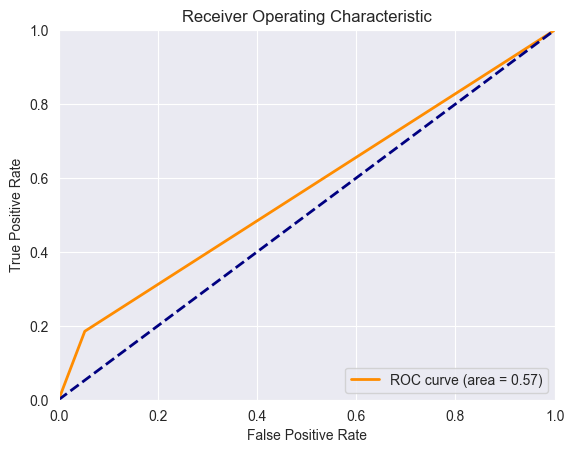

In [27]:
c1 = aoc_roc(y_test, y_pred)

Such good accuracy should not be surprising, since the collection is unbalanced and naturally more people will not have a stroke, while we are interested in extracting information about as many people as possible who are actually at risk of the possibility of stroke, so we should be interested in completeness, which in our case is unfortunately quite low. We will try to fix this with SMOTE and the production of a larger class of sick people. 

##  MLP + SMOTE

In [28]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

y_train_resampled = y_train_resampled.reshape(-1, 1)


print("\nRozkład klas po zastosowaniu SMOTE:")
print("Klasa 0:", sum(y_train_resampled == 0))
print("Klasa 1:", sum(y_train_resampled == 1))

mlp = MLP(sigmoid, sigmoid_derivative, input_layer=5, hidden_layer=7, output_layer=1)
mlp.train(X_train_resampled, y_train_resampled)
y_pred2 = mlp.predict(X_test)
cm2 = metrics.confusion_matrix(y_test, y_pred2)


Rozkład klas po zastosowaniu SMOTE:
Klasa 0: [3892]
Klasa 1: [3892]


C:\Users\HP\PycharmProjects\BigData\multi_layer_perc.py:39: RuntimeWarning: divide by zero encountered in log
  return -(np.sum(y * np.log(p) + (1 - y) * np.log(1 - p)) / len(y))
C:\Users\HP\PycharmProjects\BigData\multi_layer_perc.py:39: RuntimeWarning: invalid value encountered in multiply
  return -(np.sum(y * np.log(p) + (1 - y) * np.log(1 - p)) / len(y))
C:\Users\HP\PycharmProjects\BigData\multi_layer_perc.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-y))


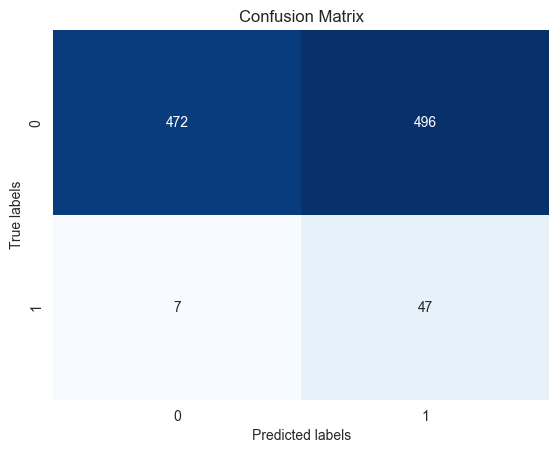

In [29]:
cm_plot(cm2)

In [30]:
p2, r2, a2 = p_metrics(y_test, y_pred2)

Precyzja (Precision): 0.0865561694290976
Pełność (Recall): 0.8703703703703703
Dokładność (Accuracy): 0.5078277886497065


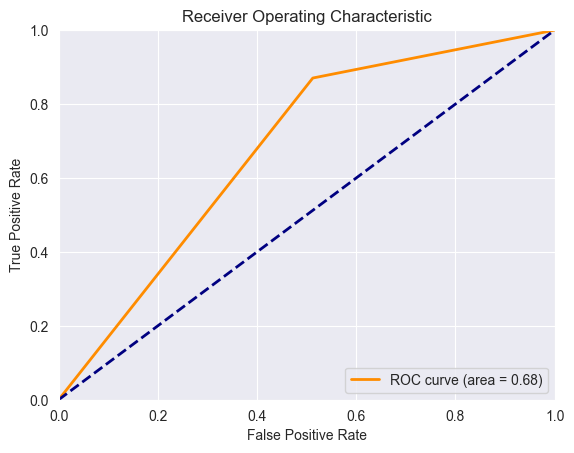

In [31]:
c2 = aoc_roc(y_test, y_pred2)

After applying the SMOTE method, indeed the model does better with the recall we wanted, but we see that through this the model is not as precise as before.

## XGBoost

C:\Users\HP\AppData\Local\Temp\ipykernel_22824\1861509513.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  params['scale_pos_weight'] = int(scale_pos_weight)


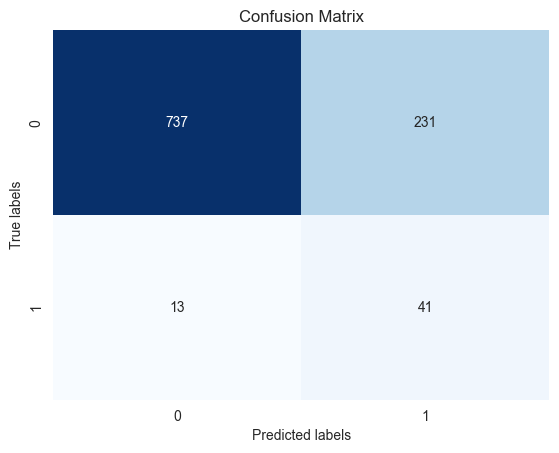

In [32]:
import xgboost as xgb
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'eta': 0.1, 
    'max_depth': 5,  
    'min_child_weight': 20,  
    'subsample': 0.8, 
    'colsample_bytree': 0.8,  
    'scale_pos_weight': 35, 
    'gamma': 0,  
    'lambda': 0,  
    'alpha': 0,  
    'seed': 42, 
    'max_delta_step': 1,
}
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
params['scale_pos_weight'] = int(scale_pos_weight)

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)

xgb_model = xgb.train(params, dtrain)
y_pred3 = (xgb_model.predict(dtest) > 0.5).astype(int)

cm3 = metrics.confusion_matrix(y_test, y_pred3)
cm_plot(cm3)


In [33]:
p3, r3, a3 = p_metrics(y_test, y_pred3)

Precyzja (Precision): 0.15073529411764705
Pełność (Recall): 0.7592592592592593
Dokładność (Accuracy): 0.761252446183953


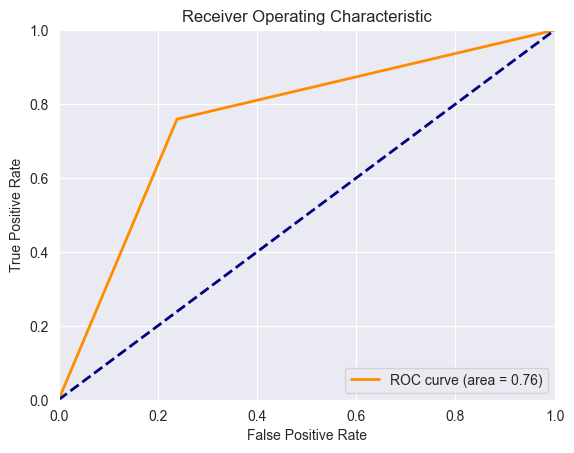

In [34]:
c3 = aoc_roc(y_test, y_pred3)

XGboost give us a really nice recall what is important for us and also we can see that accuracy is relatively good. 

## Logistic Regression 

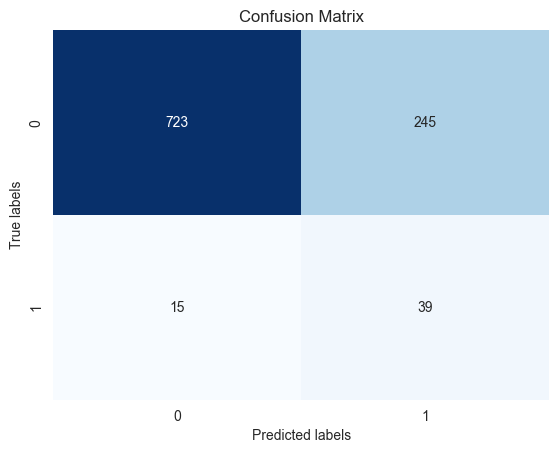

Precyzja (Precision): 0.13732394366197184
Pełność (Recall): 0.7222222222222222
Dokładność (Accuracy): 0.7455968688845401


In [35]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X, y, test_size=0.2, random_state=0)
col_to_stand = ['age', 'avg_glucose_level']
scaler = StandardScaler()
X_test_lg[col_to_stand] = scaler.fit_transform(X_test_lg[col_to_stand])
X_train_lg[col_to_stand] = scaler.fit_transform(X_train_lg[col_to_stand])

X_train_lg = X_train_lg.values
X_test_lg = X_test_lg.values
y_train_lg = y_train_lg.values
y_test_lg = y_test_lg.values

X_train_smote_lg, y_train_smote_lg = smote.fit_resample(X_train_lg, y_train_lg)

clf.fit(X_train_smote_lg, y_train_smote_lg)
y_pred4 = clf.predict(X_test_lg)

cm4 = metrics.confusion_matrix(y_test, y_pred4)
cm_plot(cm4)
p4, r4, a4 = p_metrics(y_test, y_pred4)

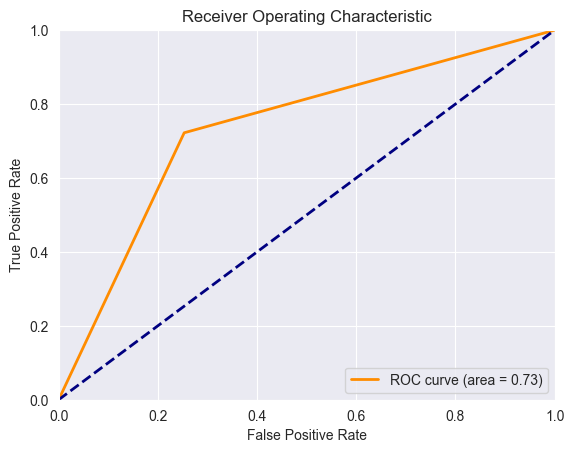

In [36]:
c4 = aoc_roc(y_test, y_pred4)

Logistic Regression with SMOTE is also a good classifier, the ROC curve is similar to XGbosst, recall and accuracy are also satisfactory.

## Random forest + grid search 

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='recall')
grid_result = grid_search.fit(X_train_smote_lg, y_train_smote_lg)
print("Best Score:", grid_result.best_score_)
print("Best Params:", grid_result.best_params_)
y_pred5 = grid_result.best_estimator_.predict(X_test_lg)



C:\Users\HP\PycharmProjects\BigData\.venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\PycharmProjects\BigData\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\PycharmProjects\BigData\.venv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\PycharmProjects\BigData\.venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_pa

Best Score: 0.9306216195702751
Best Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


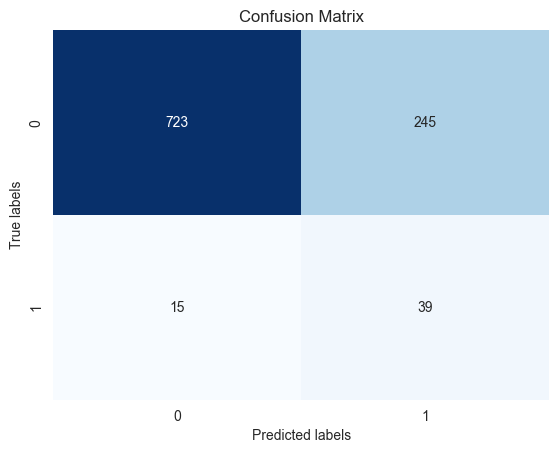

In [38]:
cm5 = metrics.confusion_matrix(y_test, y_pred4)
cm_plot(cm5)

Precyzja (Precision): 0.11811023622047244
Pełność (Recall): 0.5555555555555556
Dokładność (Accuracy): 0.7573385518590998


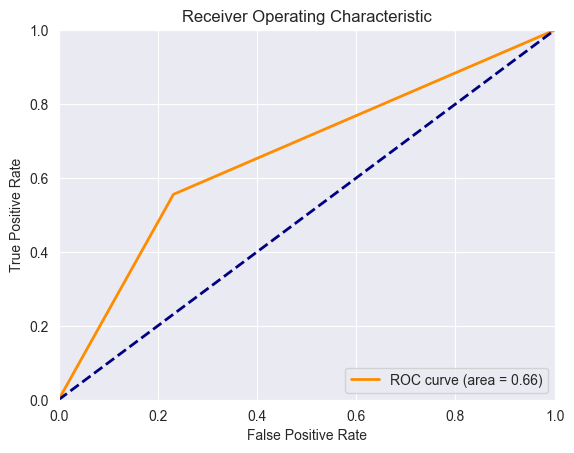

In [39]:
p5, r5, a5 = p_metrics(y_test, y_pred5)
c5 = aoc_roc(y_test, y_pred5)

Random forest is a bit disapointing because of its really low recall and ROC, however accuracy is good. 

In [40]:
m = {
    'Precision': [p1, p2, p3, p4, p5],
    'Recall': [r1, r2, r3, r4, r5],
    'Accuracy': [a1, a2, a3, a4, a5],
    'AOC': [c1, c2, c3, c4, c5]
}
index_names = ['MLP', 'MLP+SMOTE', 'XGBOOST', 'Logistic Regression+SMOTE', 'Random Forest+SMOTE+GridSearch']
df = pd.DataFrame(m, index=index_names)

In [41]:
df

,Precision,Recall,Accuracy,AOC
MLP,0.163934,0.185185,0.907045,0.566250
MLP+SMOTE,0.086556,0.870370,0.507828,0.678987
XGBOOST,0.150735,0.759259,0.761252,0.760311
Logistic Regression+SMOTE,0.137324,0.722222,0.745597,0.734562
Random Forest+SMOTE+GridSearch,0.118110,0.555556,0.757339,0.662075


To sum up, we see that the best model to predict a stroke is XGBoost or Logistic Regression, recall is good, but also accuracy is not as bad as in MLP + SMOTE. 